In [12]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [13]:
import numpy as np
import pandas as pd



In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_breast_cancer.data[['mean texture', 'mean symmetry']], data_breast_cancer.target, test_size=0.2)

best_depth = None
best_f1 = 0
results = {}


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score


for depth in range(1, 10):
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    
    results[depth] = (f1_train, f1_test, acc_train, acc_test)
    
    if f1_test > best_f1:
        best_f1 = f1_test
        best_depth = depth


print(results)


{1: (0.7824497257769653, 0.746031746031746, 0.7384615384615385, 0.7192982456140351), 2: (0.8380952380952381, 0.7746478873239436, 0.7758241758241758, 0.7192982456140351), 3: (0.8422764227642277, 0.7703703703703704, 0.7868131868131868, 0.7280701754385965), 4: (0.8553054662379421, 0.7482014388489209, 0.8021978021978022, 0.6929824561403509), 5: (0.869281045751634, 0.7407407407407407, 0.8241758241758241, 0.6929824561403509), 6: (0.8904347826086957, 0.6929133858267716, 0.8615384615384616, 0.6578947368421053), 7: (0.900709219858156, 0.6825396825396826, 0.8769230769230769, 0.6491228070175439), 8: (0.9369676320272572, 0.671875, 0.9186813186813186, 0.631578947368421), 9: (0.9401709401709402, 0.676923076923077, 0.9230769230769231, 0.631578947368421)}


In [16]:
# Trenowanie drzewa z najlepszą głębokością
tree = DecisionTreeClassifier(max_depth=best_depth)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=['mean texture', 'mean symmetry'], class_names=['malignant', 'benign'], filled=True)
plt.savefig("bc.png")
plt.close()

In [18]:
import pickle

best_results = [best_depth] + list(results[best_depth])
with open("f1acc_tree.pkl", "wb") as f:
    pickle.dump(best_results, f)

<Axes: xlabel='x', ylabel='y'>

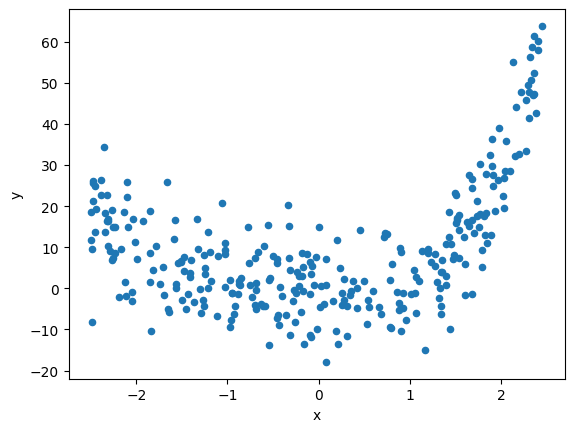

In [19]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'], test_size=0.2)  

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pickle

best_depth = None
best_mse = float("inf")
results = {}

for depth in range(1, 10):
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    results[depth] = (mse_train, mse_test)
    
    if mse_test < best_mse:
        best_mse = mse_test
        best_depth = depth
        plt.figure(figsize=(12, 8))
        plot_tree(tree, feature_names=['x'], filled=True)
        plt.savefig("reg.png")
        plt.close()


print(results)
print(best_depth, best_mse)

{1: (111.00117180997283, 99.07252457835742), 2: (75.57832806885857, 128.49235709999957), 3: (53.19882194594636, 93.27135538425976), 4: (49.017067837985664, 93.78029716359201), 5: (44.742132750925876, 91.02800802686984), 6: (37.22589908788679, 88.88681557898491), 7: (30.696523709485835, 98.59284849005032), 8: (24.872694216270826, 97.78777918749084), 9: (21.738864088921265, 99.40947749781422)}
6 88.88681557898491


In [22]:
# Zapisanie wyników do pliku Pickle
best_results = [best_depth] + list(results[best_depth])
with open("mse_tree.pkl", "wb") as f:
    pickle.dump(best_results, f)